In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [23]:
titanic = pd.read_csv('CSV/train.csv')

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Count missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# Fill missing values of Age
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

/var/folders/8j/skd2y7rd5k752cwx0v97h73c0000gn/T/ipykernel_22566/616748655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [27]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 640x480 with 0 Axes>

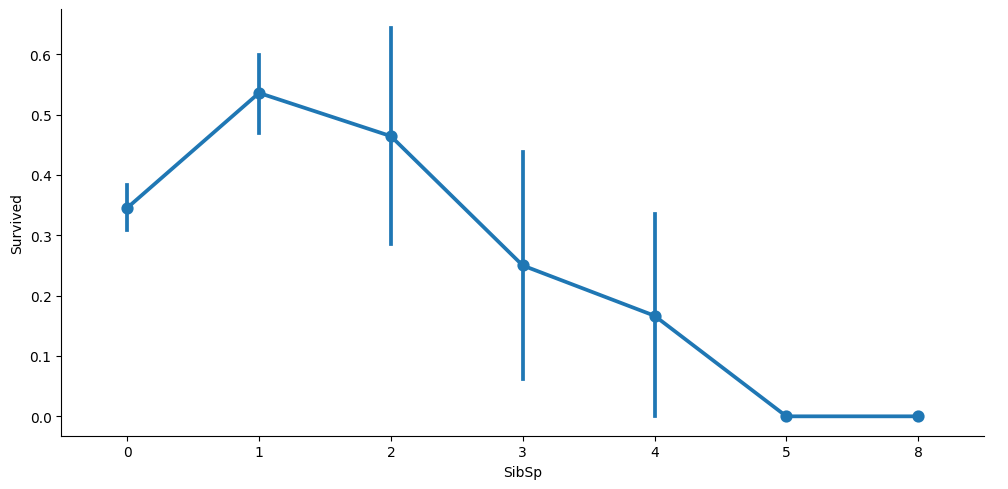

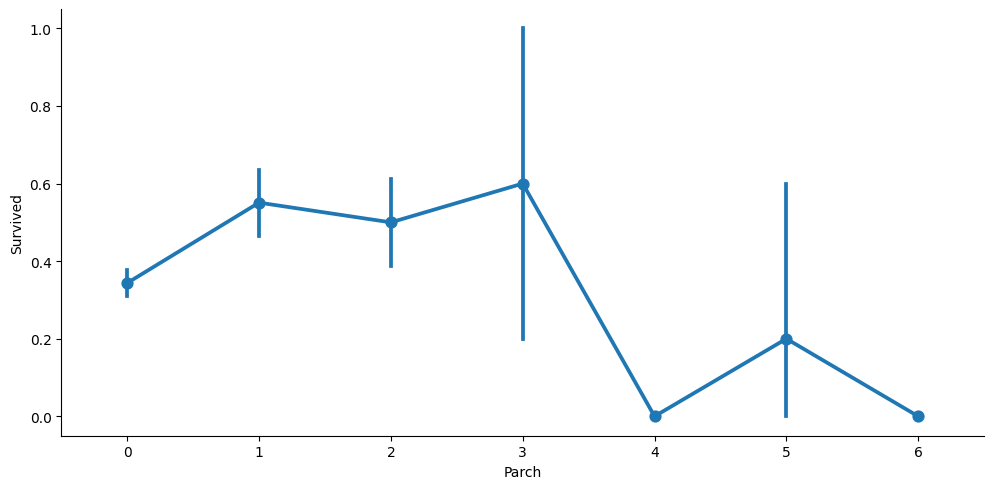

In [28]:
# Combine SibSp & Parch
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

In [29]:
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['PassengerId','SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [30]:
# save the data
titanic.to_csv('CSV/titanic_clean.csv', index=False)

In [31]:
# Binary Cabin Index
titanic['Cabin_Index'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [32]:
# Sex -> Numeric
sex_numeric = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(sex_numeric)

In [33]:
#More Cleaning
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_Index
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [34]:
# save the data
titanic.to_csv('CSV/titanic_clean.csv', index=False)

In [35]:
titanic = pd.read_csv('CSV/titanic_clean.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_Index
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [36]:
# Train Test Split
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [37]:
for data in [y_train, y_val, y_test]:
    print(round(len(data) / len(labels), 2))

0.6
0.2
0.2


In [38]:
# save the data
x_train.to_csv('CSV/train_features.csv', index=False)
x_val.to_csv('CSV/val_features.csv', index=False)
x_test.to_csv('CSV/test_features.csv', index=False)

y_train.to_csv('CSV/train_labels.csv', index=False)
y_val.to_csv('CSV/val_labels.csv', index=False)
y_test.to_csv('CSV/test_labels.csv', index=False)

Cross Validation

In [60]:
train_features = pd.read_csv('CSV/train_features.csv')
train_labels = pd.read_csv('CSV/train_labels.csv')

val_features = pd.read_csv('CSV/val_features.csv')
val_labels = pd.read_csv('CSV/val_labels.csv')

test_features = pd.read_csv('CSV/test_features.csv')
test_labels = pd.read_csv('CSV/test_labels.csv')


In [61]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)

In [62]:
scores

array([0.80373832, 0.82242991, 0.78504673, 0.80373832, 0.82075472])

Hyperparameter Tuning

In [63]:
rf = RandomForestClassifier()

hyperparams = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [2, 12, 24, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(train_features, train_labels.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 12, 24, None],
                         'n_estimators': [5, 25, 50, 100]})

In [64]:
def results(results):
    print('Optimal Hyperparams: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('Mean {} Standart Deviation {} Hyperparameters {}'.format(round(mean, 3), round(std * 2, 3), params))

In [65]:
results(cross_val)

Optimal Hyperparams: {'max_depth': 12, 'n_estimators': 50}

Mean 0.779 Standart Deviation 0.148 Hyperparameters {'max_depth': 2, 'n_estimators': 5}
Mean 0.796 Standart Deviation 0.103 Hyperparameters {'max_depth': 2, 'n_estimators': 25}
Mean 0.792 Standart Deviation 0.135 Hyperparameters {'max_depth': 2, 'n_estimators': 50}
Mean 0.811 Standart Deviation 0.102 Hyperparameters {'max_depth': 2, 'n_estimators': 100}
Mean 0.801 Standart Deviation 0.063 Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Mean 0.809 Standart Deviation 0.027 Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Mean 0.826 Standart Deviation 0.043 Hyperparameters {'max_depth': 12, 'n_estimators': 50}
Mean 0.813 Standart Deviation 0.045 Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Mean 0.802 Standart Deviation 0.043 Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Mean 0.8 Standart Deviation 0.046 Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Mean 0.816 Standart Deviation 0.026 Hyperparame

In [66]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=12)
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=12)
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=25, max_depth=24)
rf3.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(max_depth=24, n_estimators=25)

Model Evaluation

In [67]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)

    print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
                                                                                                  mdl.n_estimators,
                                                                                                  accuracy,
                                                                                                  precision,
                                                                                                  recall))

Max Depth: 12 || Estimators: 100 || Accuracy: 0.827 || Precision: 0.826 || Recall: 0.75
Max Depth: 12 || Estimators: 50 || Accuracy: 0.816 || Precision: 0.831 || Recall: 0.711
Max Depth: 24 || Estimators: 25 || Accuracy: 0.816 || Precision: 0.812 || Recall: 0.737


In [68]:

y_pred = rf1.predict(test_features)
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf1.max_depth,
                                                                                                  rf1.n_estimators,
                                                                                                  accuracy,
                                                                                                  precision,
                                                                                                  recall))

Max Depth: 12 || Estimators: 100 || Accuracy: 0.781 || Precision: 0.717 || Recall: 0.662
